# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

D:\Users\ryanl\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """
    Build your own model
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

# optimizers_SGD

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4]
EPOCHS = 30
BATCH_SIZE = 256
MOMENTUM = [0.95, 0.75, 0.55]

In [7]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in LEARNING_RATE:
    for mt in MOMENTUM:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with LR = %.6f" % (lr) + "mt-%s" % str(mt))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=mt)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = "exp-lr-%s" % str(lr) + "mt-%s" % str(mt)
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

Experiment with LR = 0.100000mt-0.95
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updat

Epoch 10/30
50000/50000 [==============================] - 11s 216us/step - loss: 1.4756 - acc: 0.4687 - val_loss: 1.6260 - val_acc: 0.4214
Epoch 11/30
50000/50000 [==============================] - 10s 205us/step - loss: 1.4510 - acc: 0.4790 - val_loss: 1.5611 - val_acc: 0.4399
Epoch 12/30
50000/50000 [==============================] - 10s 204us/step - loss: 1.4255 - acc: 0.4863 - val_loss: 1.5533 - val_acc: 0.4501
Epoch 13/30
50000/50000 [==============================] - 10s 204us/step - loss: 1.4066 - acc: 0.4968 - val_loss: 1.5211 - val_acc: 0.4576
Epoch 14/30
50000/50000 [==============================] - 10s 203us/step - loss: 1.3748 - acc: 0.5066 - val_loss: 1.6053 - val_acc: 0.4344
Epoch 15/30
50000/50000 [==============================] - 11s 216us/step - loss: 1.3651 - acc: 0.5101 - val_loss: 1.4533 - val_acc: 0.4825
Epoch 16/30
50000/50000 [==============================] - 10s 207us/step - loss: 1.3341 - acc: 0.5227 - val_loss: 1.5180 - val_acc: 0.4637
Epoch 17/30
50000/50

Experiment with LR = 0.010000mt-0.95
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [=====================

50000/50000 [==============================] - 10s 206us/step - loss: 1.3136 - acc: 0.5370 - val_loss: 1.4771 - val_acc: 0.4852
Epoch 15/30
50000/50000 [==============================] - 10s 206us/step - loss: 1.2961 - acc: 0.5411 - val_loss: 1.4467 - val_acc: 0.4815
Epoch 16/30
50000/50000 [==============================] - 10s 210us/step - loss: 1.2781 - acc: 0.5466 - val_loss: 1.5103 - val_acc: 0.4574
Epoch 17/30
50000/50000 [==============================] - 10s 205us/step - loss: 1.2605 - acc: 0.5535 - val_loss: 1.5137 - val_acc: 0.4777
Epoch 18/30
50000/50000 [==============================] - 10s 206us/step - loss: 1.2419 - acc: 0.5619 - val_loss: 1.4542 - val_acc: 0.4850
Epoch 19/30
50000/50000 [==============================] - 10s 206us/step - loss: 1.2292 - acc: 0.5668 - val_loss: 1.3685 - val_acc: 0.5145
Epoch 20/30
50000/50000 [==============================] - 11s 210us/step - loss: 1.2063 - acc: 0.5771 - val_loss: 1.4076 - val_acc: 0.4989
Epoch 21/30
50000/50000 [=======

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 11s 217us/step - loss: 2.0292 - acc: 0.2751 - val_loss: 1.8630 - val_acc: 0.3506
Epoch 2/30
50000/50000 [==============================] - 11s 215us/step - loss: 1.8029 - acc: 0.3703 - val_loss: 1.7560 - val_acc: 0.3810
Epoch 3/30
50000/50000 [==============================] - 11s 213us/step - loss: 1.7186 - acc: 0.4002 - val_loss: 1.6872 - val_acc: 0.4086
Epoch 4/30
50000/50000 [==============================] - 11s 212us/step - loss: 1.6582 - acc: 0.4234 - val_loss: 1.6444 - val_acc: 0.4200
Epoch 5/30
50000/50000 [==============================] - 11s 214us/step - loss: 1.6113 - acc: 0.4368 - val_loss: 1.6075 - val_acc: 0.4358
Epoch 6/30
50000/50000 [==============================] - 11s 213us/step - loss: 1.5727 - acc: 0.4511 - val_loss: 1.5724 - val_acc: 0.4442
Epoch 7/30
50000/50000 [==============================] - 11s 214us/step - loss: 1.5380 - acc: 0.4614 - val_loss: 1.

50000/50000 [==============================] - 11s 213us/step - loss: 1.5987 - acc: 0.4410 - val_loss: 1.6038 - val_acc: 0.4415
Epoch 21/30
50000/50000 [==============================] - 11s 213us/step - loss: 1.5901 - acc: 0.4443 - val_loss: 1.5992 - val_acc: 0.4398
Epoch 22/30
50000/50000 [==============================] - 11s 214us/step - loss: 1.5812 - acc: 0.4478 - val_loss: 1.5957 - val_acc: 0.4424
Epoch 23/30
50000/50000 [==============================] - 11s 214us/step - loss: 1.5723 - acc: 0.4500 - val_loss: 1.5825 - val_acc: 0.4432
Epoch 24/30
50000/50000 [==============================] - 11s 213us/step - loss: 1.5639 - acc: 0.4529 - val_loss: 1.5738 - val_acc: 0.4503
Epoch 25/30
50000/50000 [==============================] - 11s 215us/step - loss: 1.5559 - acc: 0.4562 - val_loss: 1.5746 - val_acc: 0.4514
Epoch 26/30
50000/50000 [==============================] - 11s 215us/step - loss: 1.5476 - acc: 0.4582 - val_loss: 1.5617 - val_acc: 0.4560
Epoch 27/30
50000/50000 [=======

50000/50000 [==============================] - 11s 211us/step - loss: 2.0378 - acc: 0.2880 - val_loss: 2.0098 - val_acc: 0.2938
Epoch 4/30
50000/50000 [==============================] - 11s 212us/step - loss: 1.9841 - acc: 0.3051 - val_loss: 1.9629 - val_acc: 0.3142
Epoch 5/30
50000/50000 [==============================] - 11s 211us/step - loss: 1.9435 - acc: 0.3188 - val_loss: 1.9279 - val_acc: 0.3274
Epoch 6/30
50000/50000 [==============================] - 11s 211us/step - loss: 1.9119 - acc: 0.3297 - val_loss: 1.9005 - val_acc: 0.3333
Epoch 7/30
50000/50000 [==============================] - 11s 210us/step - loss: 1.8869 - acc: 0.3380 - val_loss: 1.8784 - val_acc: 0.3395
Epoch 8/30
50000/50000 [==============================] - 11s 213us/step - loss: 1.8662 - acc: 0.3463 - val_loss: 1.8595 - val_acc: 0.3512
Epoch 9/30
50000/50000 [==============================] - 11s 210us/step - loss: 1.8488 - acc: 0.3545 - val_loss: 1.8435 - val_acc: 0.3543
Epoch 10/30
50000/50000 [=============

Epoch 24/30
50000/50000 [==============================] - 11s 214us/step - loss: 1.9242 - acc: 0.3306 - val_loss: 1.9189 - val_acc: 0.3277
Epoch 25/30
50000/50000 [==============================] - 11s 214us/step - loss: 1.9177 - acc: 0.3326 - val_loss: 1.9128 - val_acc: 0.3299- ac
Epoch 26/30
50000/50000 [==============================] - 11s 215us/step - loss: 1.9117 - acc: 0.3352 - val_loss: 1.9072 - val_acc: 0.33322s - loss: 1.9183 - acc: 0. - ETA: 2s - los - ETA: 0s - loss: 1.9149 -
Epoch 27/30
50000/50000 [==============================] - 11s 216us/step - loss: 1.9059 - acc: 0.3367 - val_loss: 1.9016 - val_acc: 0.3336
Epoch 28/30
50000/50000 [==============================] - 11s 211us/step - loss: 1.9003 - acc: 0.3386 - val_loss: 1.8965 - val_acc: 0.336911 - acc: 0.
Epoch 29/30
50000/50000 [==============================] - 11s 214us/step - loss: 1.8952 - acc: 0.3408 - val_loss: 1.8912 - val_acc: 0.3386
Epoch 30/30
50000/50000 [==============================] - 11s 213us/step 

optimizers_SGD


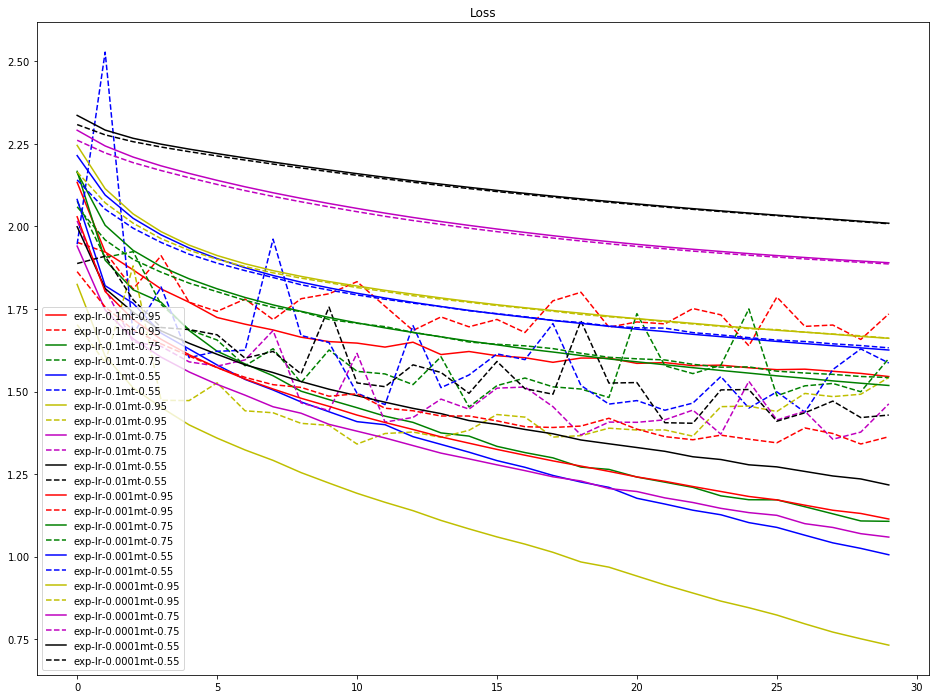

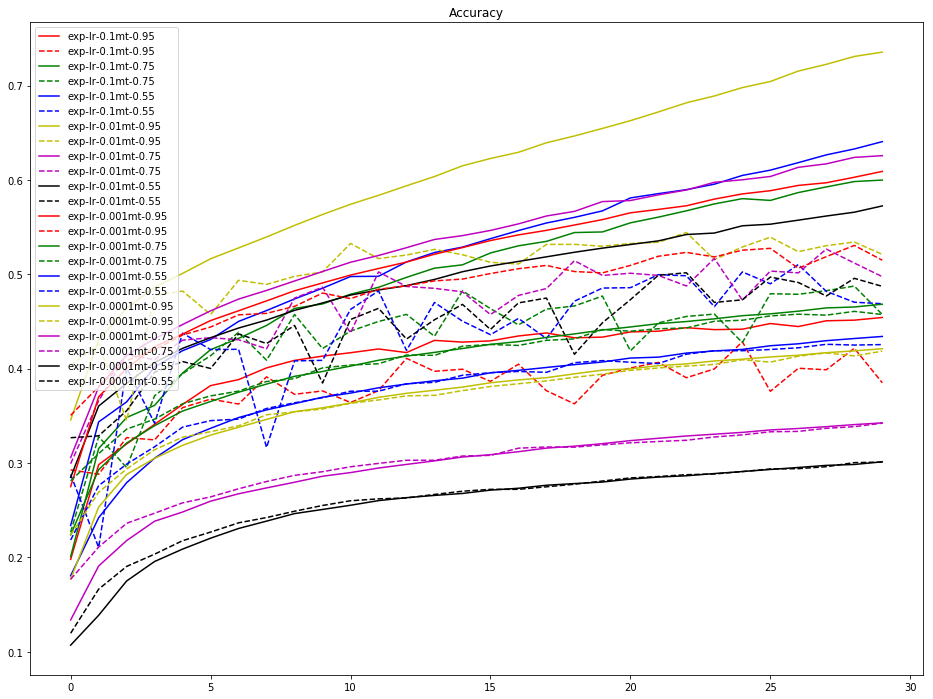

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]
print("optimizers_SGD")

plt.figure(figsize=(16,12))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i%6])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i%6])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(16,12))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i%6])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i%6])
plt.title("Accuracy")
plt.legend()
plt.show()

# optimizers_RMSprop

In [9]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4]
EPOCHS = 30
BATCH_SIZE = 256

In [10]:
results = {}
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.RMSprop(lr=lr, decay=0.0)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [============================

50000/50000 [==============================] - 12s 239us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 14/30
50000/50000 [==============================] - 12s 237us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 15/30
50000/50000 [==============================] - 12s 238us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 16/30
50000/50000 [==============================] - 12s 237us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 17/30
50000/50000 [==============================] - 12s 236us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 18/30
50000/50000 [==============================] - 12s 237us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 19/30
50000/50000 [==============================] - 12s 239us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 20/30
50000/

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 13s 250us/step - loss: 1.9704 - acc: 0.2910 - val_loss: 1.9010 - val_acc: 0.3162
Epoch 2/30
50000/50000 [==============================] - 12s 245us/step - loss: 1.7920 - acc: 0.3642 - val_loss: 1.8881 - val_acc: 0.3317
Epoch 3/30
50000/50000 [==============================] - 12s 245us/step - loss: 1.7133 - acc: 0.3955 - val_loss: 1.8375 - val_acc: 0.3532
Epoch 4/30
50000/50000 [==============================] - 12s 245us/step - loss: 1.6541 - acc: 0.4134 - val_loss: 1.6864 - val_acc: 0.4005
Epoch 5/30
50000/50000 [==============================] - 12s 243us/step - loss: 1.6158 - acc: 0.4307 - val_loss: 1.6765 - val_acc: 0.3992
Epoch 6/30
50000/50000 [==============================] - 12s 241us/step - loss: 1.5746 - acc: 0.4462 - val_loss: 1.5886 - val_acc: 0.4286
Epoch 7/30
50000/50000 [==============================] - 12s 243us/step - loss: 1.5440 - acc: 0.4555 - val_loss: 1.

optimizers_RMSprop


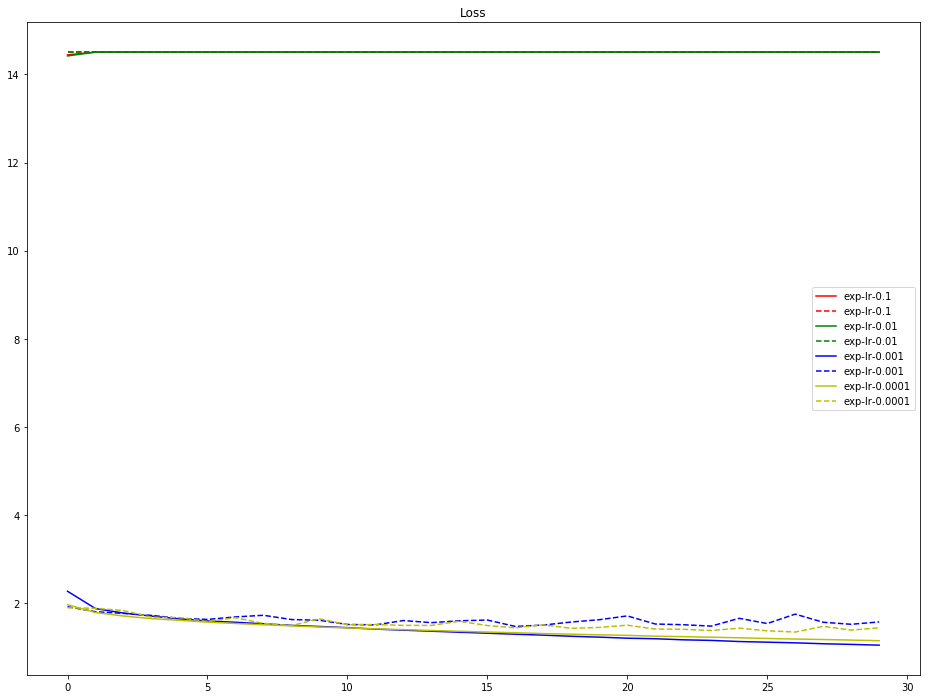

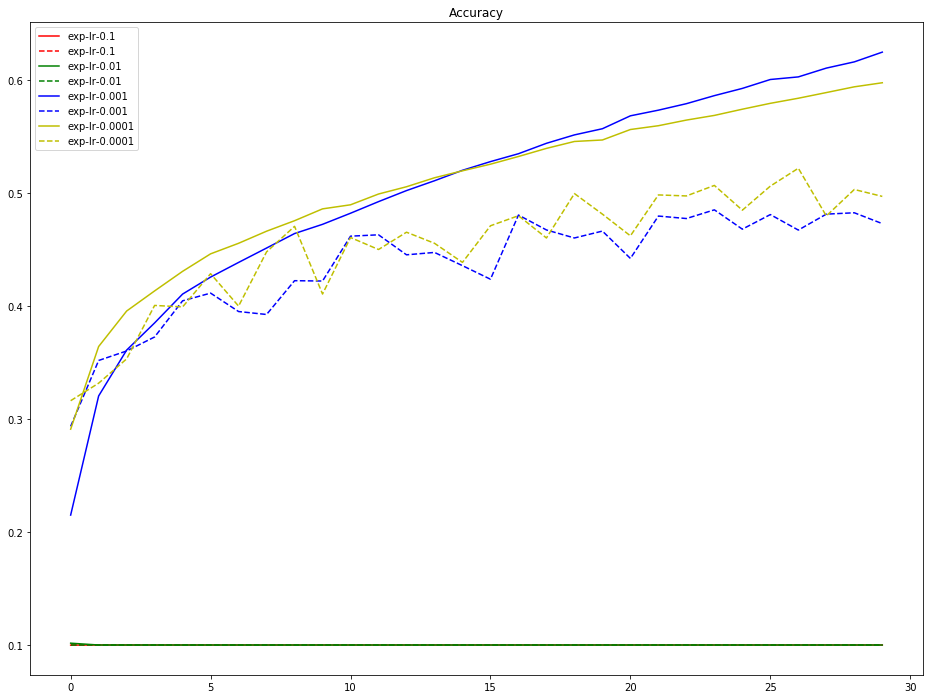

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]
print("optimizers_RMSprop")

plt.figure(figsize=(16,12))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i%6])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i%6])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(16,12))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i%6])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i%6])
plt.title("Accuracy")
plt.legend()
plt.show()

# optimizers_Adagrad

In [12]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4]
EPOCHS = 30
BATCH_SIZE = 256

In [13]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.Adagrad(lr=lr, decay=0.0)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]

    exp_name_tag = "exp-lr-%s" % str(lr) 
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [============================

50000/50000 [==============================] - 11s 228us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 14/30
50000/50000 [==============================] - 11s 227us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 15/30
50000/50000 [==============================] - 11s 227us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 16/30
50000/50000 [==============================] - 11s 227us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 17/30
50000/50000 [==============================] - 11s 227us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 18/30
50000/50000 [==============================] - 11s 227us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 19/30
50000/50000 [==============================] - 11s 229us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 20/30
50000/

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 12s 233us/step - loss: 2.0272 - acc: 0.2927 - val_loss: 1.9565 - val_acc: 0.3167
Epoch 2/30
50000/50000 [==============================] - 12s 240us/step - loss: 1.9087 - acc: 0.3383 - val_loss: 1.8856 - val_acc: 0.3511
Epoch 3/30
50000/50000 [==============================] - 12s 242us/step - loss: 1.8656 - acc: 0.3544 - val_loss: 1.8574 - val_acc: 0.3593
Epoch 4/30
50000/50000 [==============================] - 12s 231us/step - loss: 1.8391 - acc: 0.3633 - val_loss: 1.8346 - val_acc: 0.3685
Epoch 5/30
50000/50000 [==============================] - 12s 232us/step - loss: 1.8191 - acc: 0.3716 - val_loss: 1.8157 - val_acc: 0.3714
Epoch 6/30
50000/50000 [==============================] - 11s 229us/step - loss: 1.8031 - acc: 0.3768 - val_loss: 1.8038 - val_acc: 0.3746
Epoch 7/30
50000/50000 [==============================] - 12s 231us/step - loss: 1.7902 - acc: 0.3814 - val_loss: 1.

optimizers_Adagrad


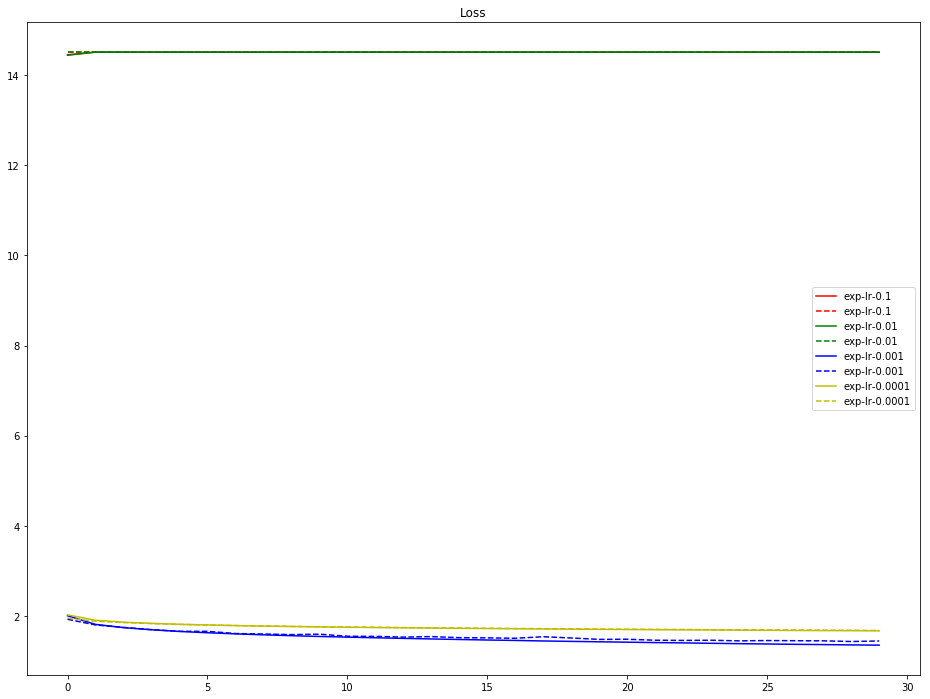

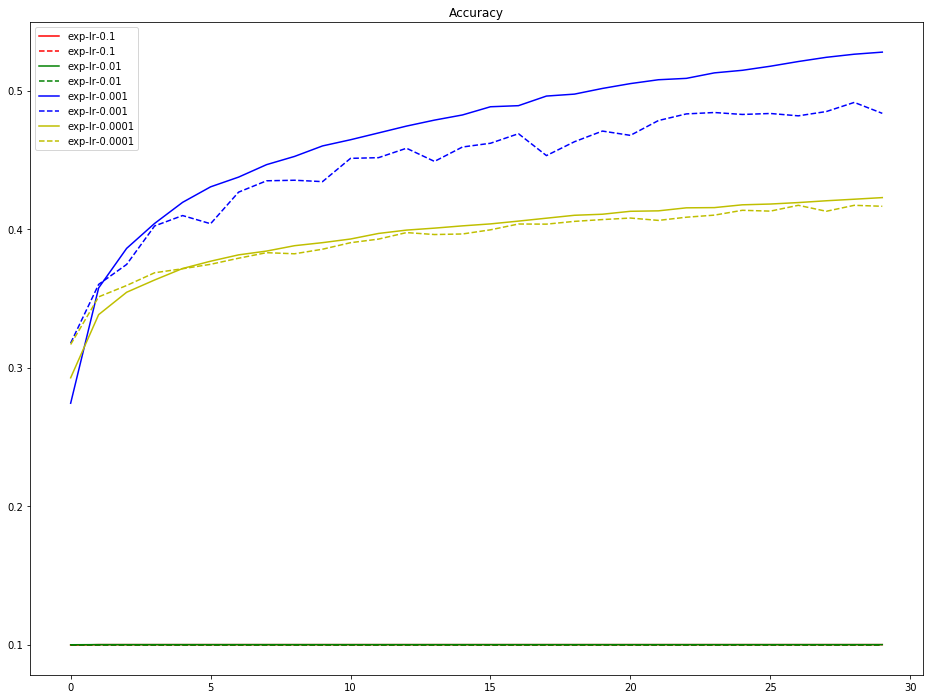

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]
print("optimizers_Adagrad")

plt.figure(figsize=(16,12))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i%6])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i%6])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(16,12))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i%6])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i%6])
plt.title("Accuracy")
plt.legend()
plt.show()

In [15]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4]
EPOCHS = 30
BATCH_SIZE = 256

In [20]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.Adam(lr=lr, beta_1=0.9, beta_2=0.999,  decay=0.0)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]

    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [============================

50000/50000 [==============================] - 13s 266us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 14/30
50000/50000 [==============================] - 13s 267us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 15/30
50000/50000 [==============================] - 13s 264us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 16/30
50000/50000 [==============================] - 13s 265us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 17/30
50000/50000 [==============================] - 14s 271us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 18/30
50000/50000 [==============================] - 13s 268us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 19/30
50000/50000 [==============================] - 13s 264us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 20/30
50000/

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 13s 265us/step - loss: 1.9011 - acc: 0.3231 - val_loss: 1.7439 - val_acc: 0.3834
Epoch 2/30
50000/50000 [==============================] - 13s 263us/step - loss: 1.7026 - acc: 0.3989 - val_loss: 1.6501 - val_acc: 0.4227
Epoch 3/30
50000/50000 [==============================] - 13s 263us/step - loss: 1.6160 - acc: 0.4323 - val_loss: 1.5952 - val_acc: 0.4369
Epoch 4/30
50000/50000 [==============================] - 13s 259us/step - loss: 1.5670 - acc: 0.4505 - val_loss: 1.5797 - val_acc: 0.4403
Epoch 5/30
50000/50000 [==============================] - 13s 259us/step - loss: 1.5211 - acc: 0.4628 - val_loss: 1.5510 - val_acc: 0.4548
Epoch 6/30
50000/50000 [==============================] - 13s 258us/step - loss: 1.4864 - acc: 0.4766 - val_loss: 1.5512 - val_acc: 0.4529
Epoch 7/30
50000/50000 [==============================] - 13s 258us/step - loss: 1.4581 - acc: 0.4866 - val_loss: 1.

optimizers_Adam


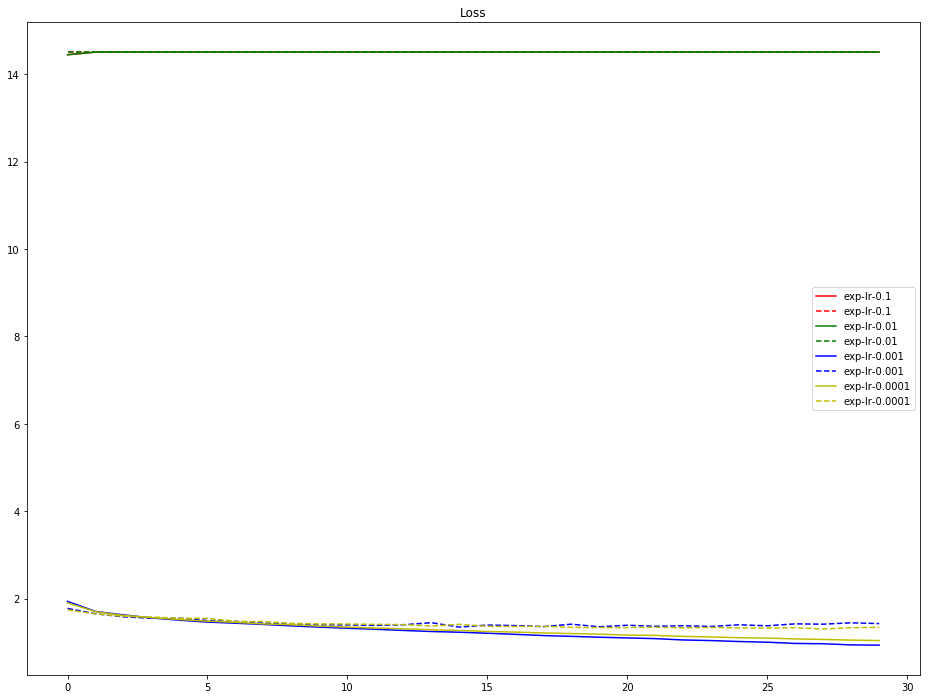

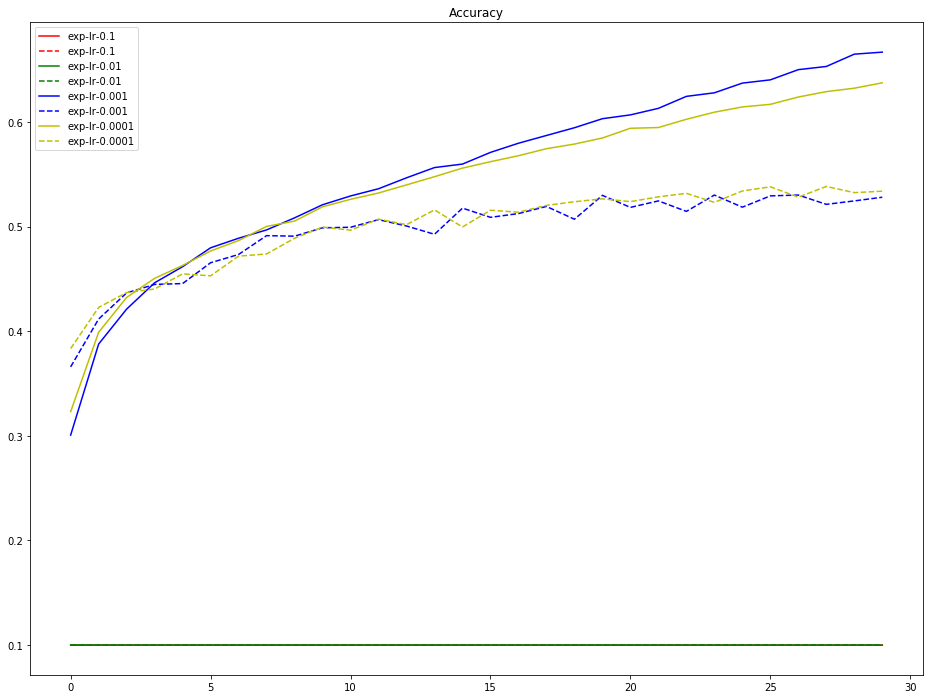

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]
print("optimizers_Adam")

plt.figure(figsize=(16,12))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i%6])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i%6])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(16,12))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i%6])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i%6])
plt.title("Accuracy")
plt.legend()
plt.show()